In [1]:
from wrangle import wrangle_telco, wrangle_split_telco
import sklearn.preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

1.) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution

### MinMax

In [2]:
train, validate, test = wrangle_split_telco()

In [3]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6674-KVJHG,25.20,11,245.15
4291-HYEBC,39.10,28,1096.60
2073-QBVBI,35.45,41,1391.65
0326-VDYXE,97.65,70,6982.50
9732-OUYRN,19.00,49,918.70


<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

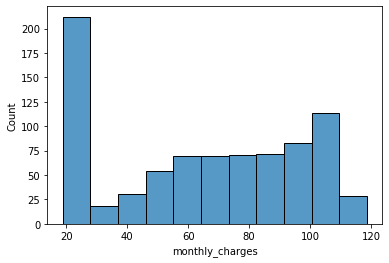

In [9]:
sns.histplot(data = train, x='monthly_charges')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

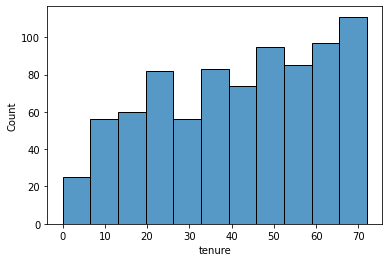

In [7]:
sns.histplot(data = train, x='tenure')

<AxesSubplot:xlabel='total_charges', ylabel='Count'>

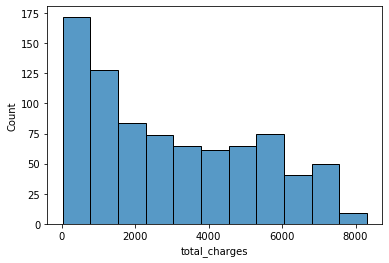

In [8]:
sns.histplot(data = train, x='total_charges')

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

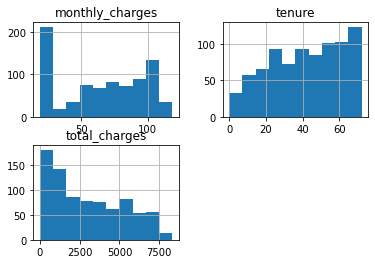

In [4]:
train.hist()

Min-Max Scaling

In [112]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [113]:
scaler.fit(train)

MinMaxScaler()

In [114]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [115]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [51]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.064128,0.152778,0.027202
1,0.203407,0.388889,0.129911
2,0.166834,0.569444,0.165503
3,0.790080,0.972222,0.839920
4,0.002004,0.680556,0.108451


<AxesSubplot:>

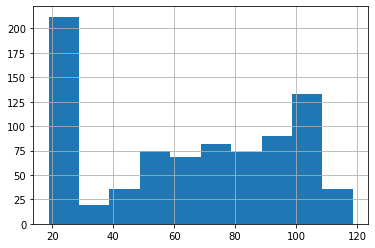

In [22]:
#unscaled monthly_charges
train.monthly_charges.hist()

<AxesSubplot:>

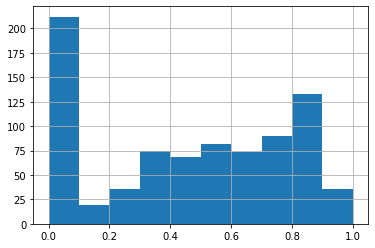

In [21]:
#scaled monthly_charges
train_scaled.monthly_charges.hist()

<AxesSubplot:>

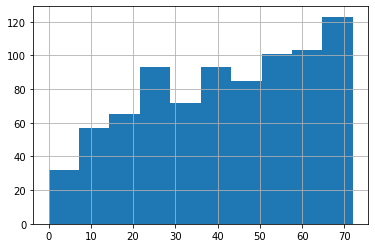

In [23]:
#unscaled tenure
train.tenure.hist()

<AxesSubplot:>

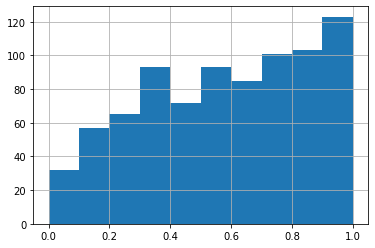

In [24]:
#scaled tenure
train_scaled.tenure.hist()

<AxesSubplot:>

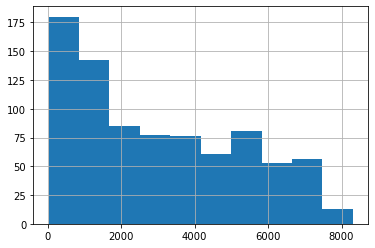

In [25]:
#unscaled
train.total_charges.hist()

<AxesSubplot:>

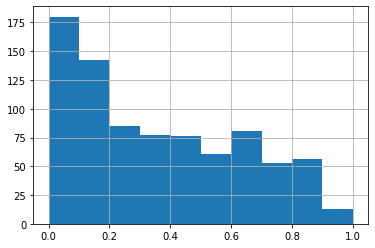

In [26]:
#scaled
train_scaled.total_charges.hist()

Text(0.5, 1.0, 'Scaled')

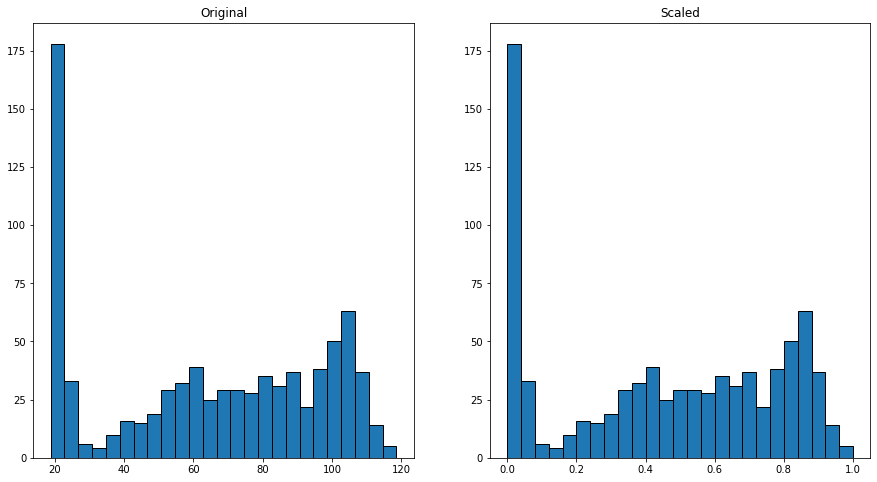

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

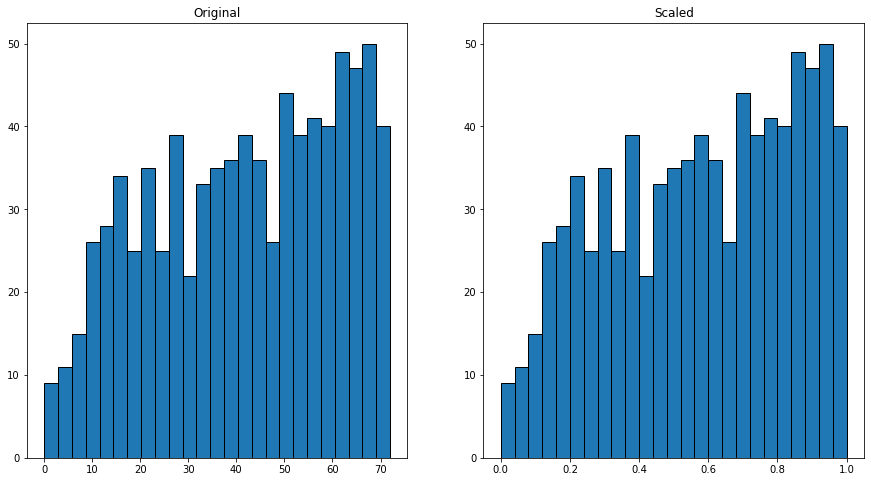

In [54]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

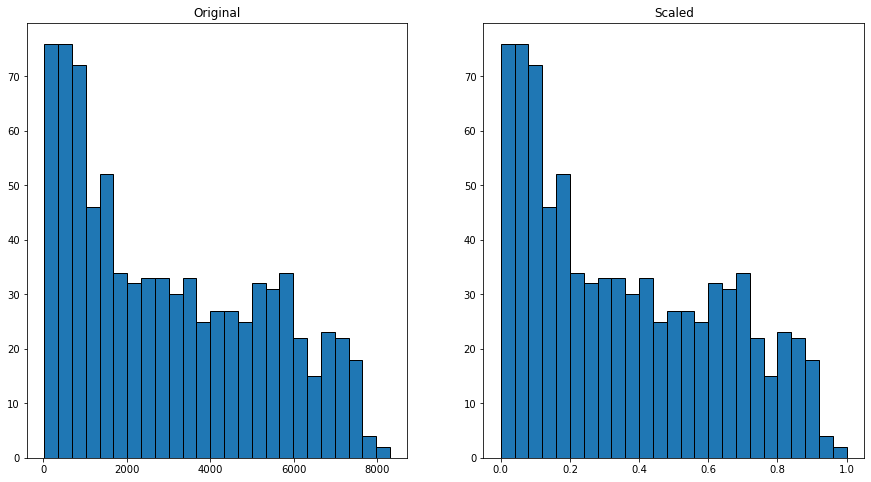

In [52]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

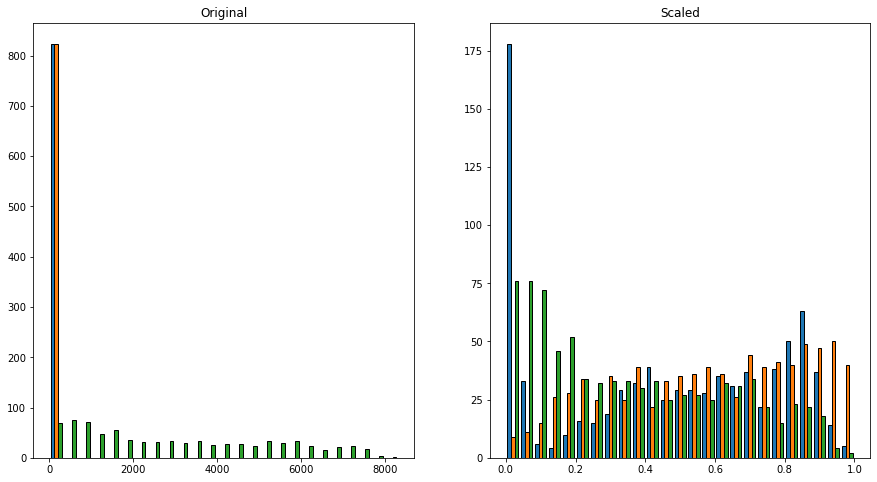

In [89]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

### Standardization 

In [121]:
scaler = sklearn.preprocessing.StandardScaler()

In [122]:
scaler.fit(train)

StandardScaler()

In [123]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [124]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [31]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,-1.227655,-1.578988,-1.227416
1,-0.793270,-0.705914,-0.849418
2,-0.907335,-0.038269,-0.718432
3,1.036457,1.451093,1.763606
4,-1.421409,0.372590,-0.928396


<AxesSubplot:>

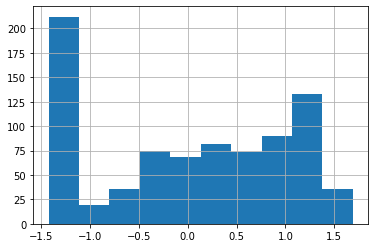

In [32]:
train_scaled.monthly_charges.hist()

<AxesSubplot:>

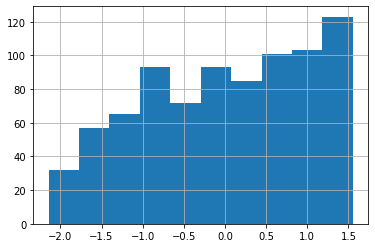

In [33]:
train_scaled.tenure.hist()

<AxesSubplot:>

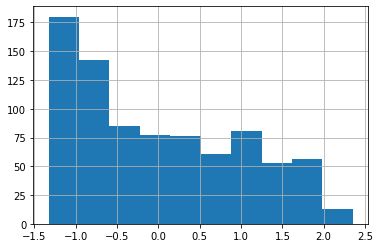

In [34]:
train_scaled.total_charges.hist()

Text(0.5, 1.0, 'Scaled')

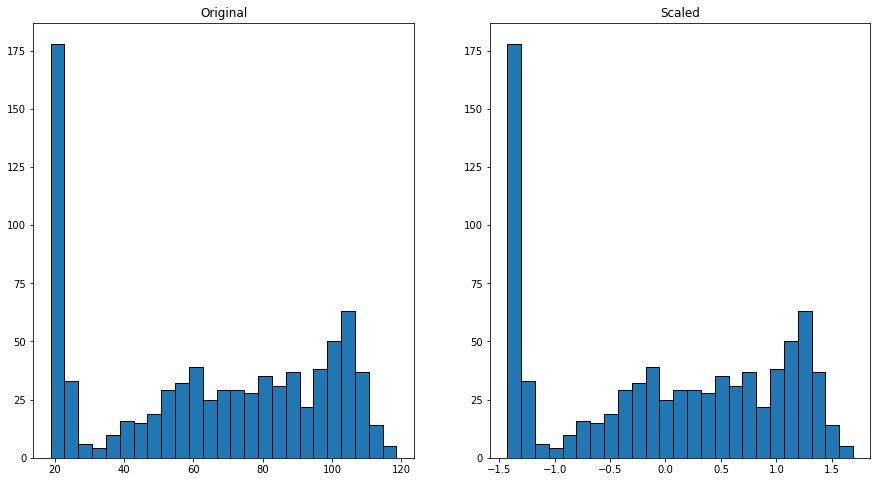

In [94]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

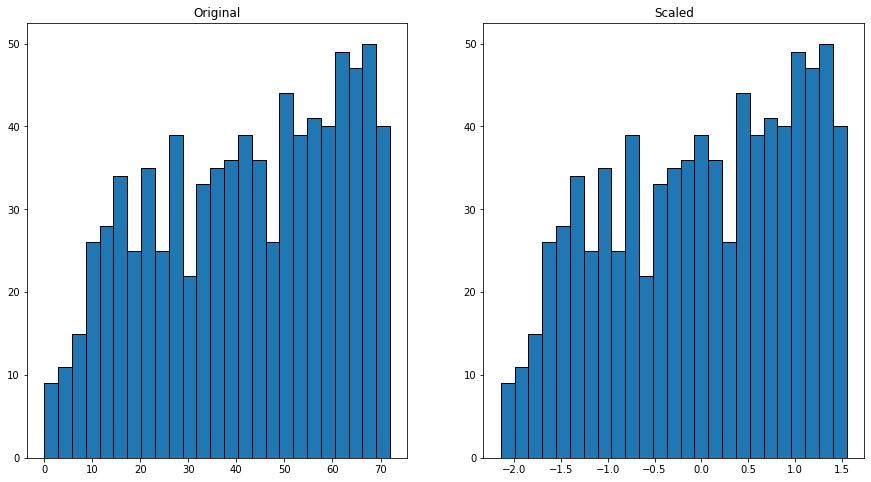

In [95]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

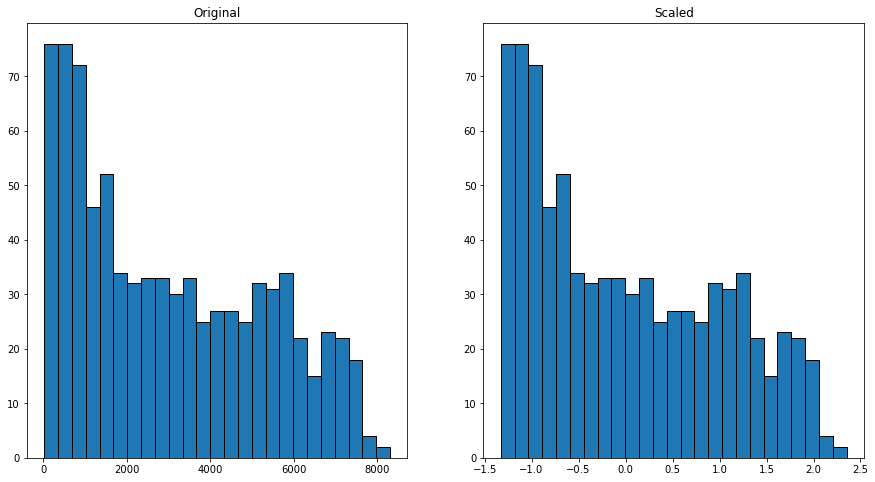

In [96]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

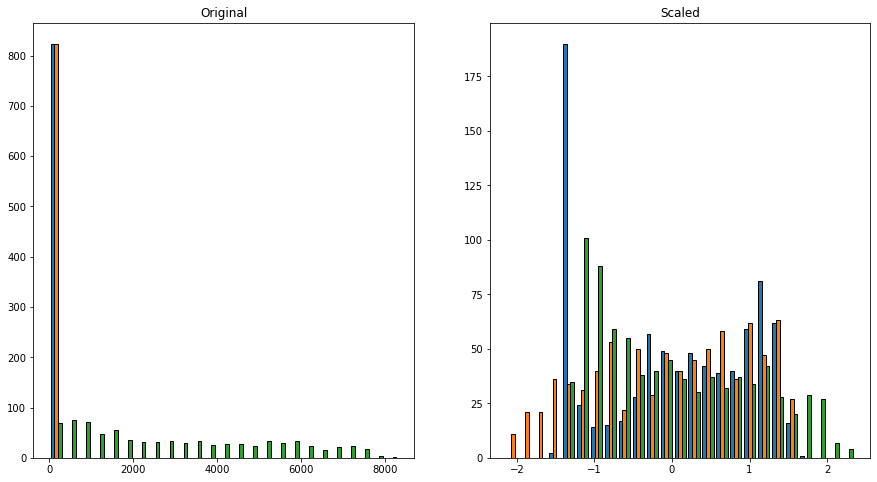

In [97]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

### RobustScaler

In [128]:
scaler = sklearn.preprocessing.RobustScaler()

In [129]:
scaler.fit(train)

RobustScaler()

In [130]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [131]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [39]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,-0.630931,-0.955882,-0.575641
1,-0.429555,-0.455882,-0.363762
2,-0.482434,-0.073529,-0.290340
3,0.418689,0.779412,1.100916
4,-0.720753,0.161765,-0.408031


<AxesSubplot:>

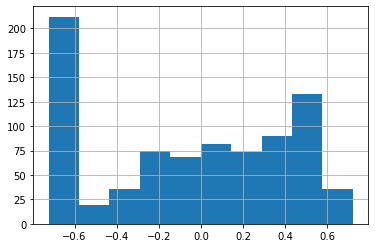

In [40]:
train_scaled.monthly_charges.hist()

<AxesSubplot:>

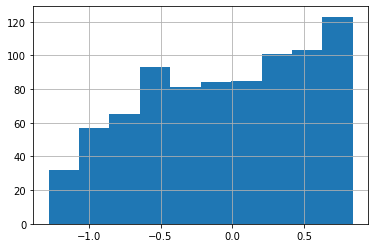

In [41]:
train_scaled.tenure.hist()

<AxesSubplot:>

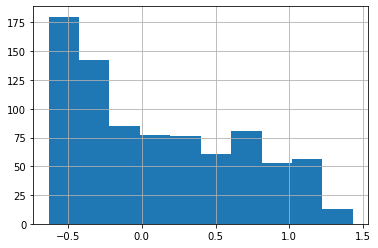

In [42]:
train_scaled.total_charges.hist()

Text(0.5, 1.0, 'Scaled')

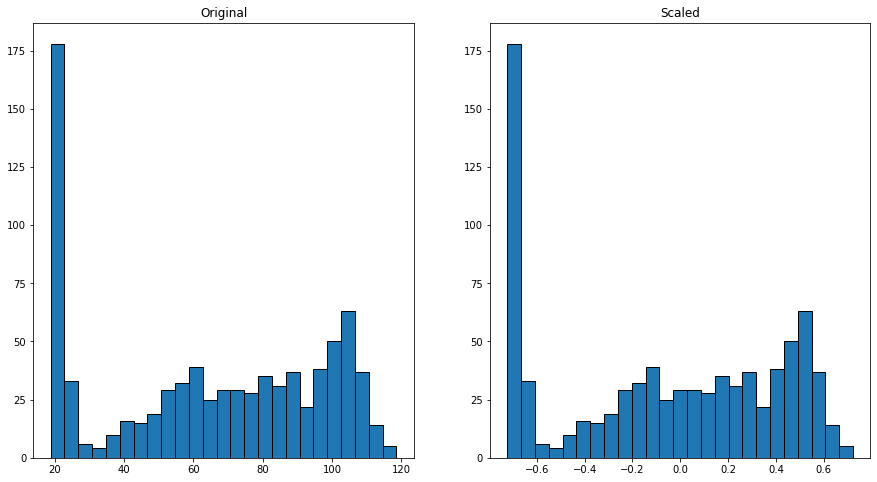

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

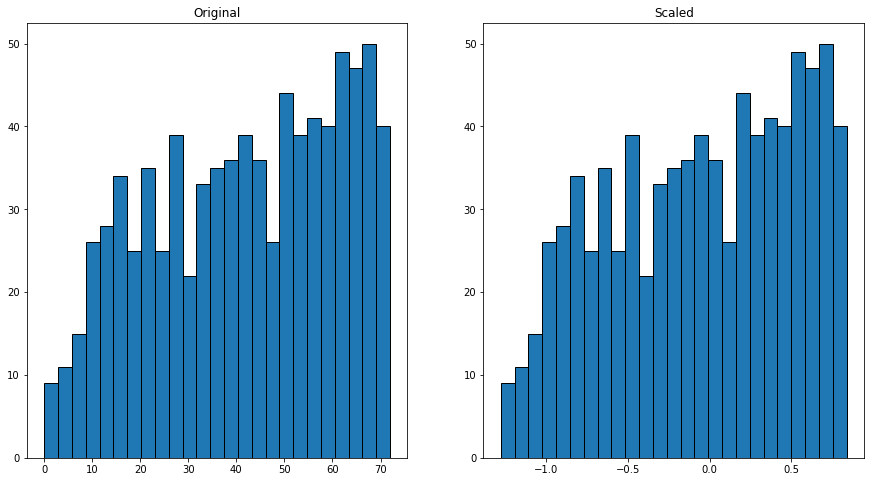

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

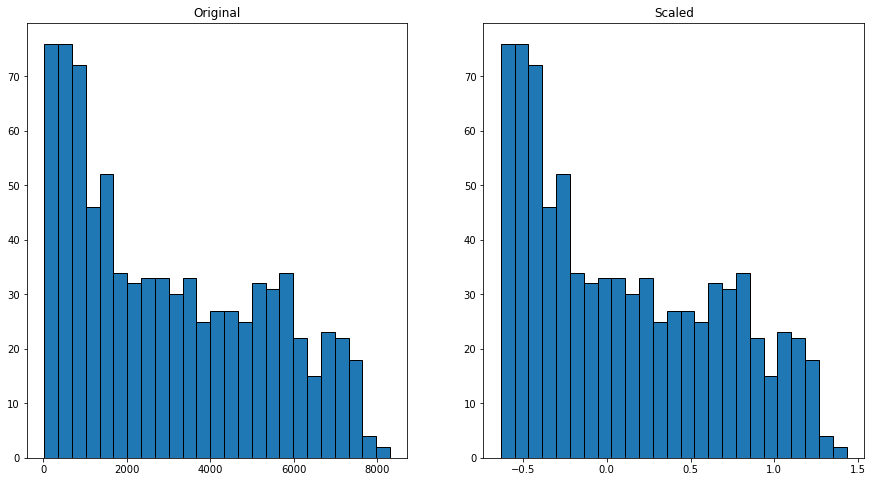

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

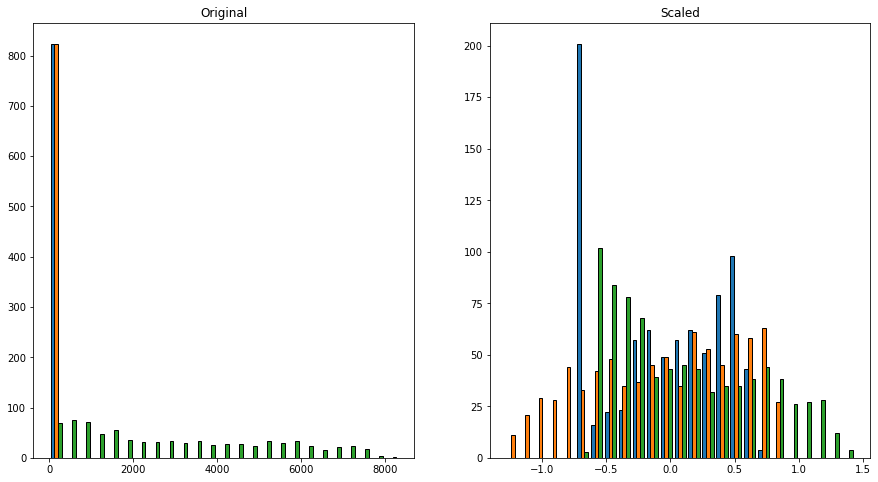

In [46]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

Takeaways for Question 1:
   - The shape of the distribution does not change for MinMax, Standardization, or RobustScaler. 

2.) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [ ]:
#MinMax

In [116]:
inv_train = scaler.inverse_transform(train_scaled)

In [117]:
inv_train = pd.DataFrame(inv_train, index = train.index, columns = train.columns)

In [118]:
inv_train.describe()

,monthly_charges,tenure,total_charges
count,824.000000,824.000000,824.000000
mean,64.484102,41.745146,3009.934749
std,32.018748,19.483254,2253.891804
min,18.800000,0.000000,19.650000
25%,25.700000,25.000000,957.850000
50%,68.750000,43.500000,2558.400000
75%,94.725000,59.000000,4976.412500
max,118.600000,72.000000,8309.550000


In [119]:
train_scaled.describe()

,monthly_charges,tenure,total_charges
count,824.000000,824.000000,824.000000
mean,0.457757,0.579794,0.360714
std,0.320829,0.270601,0.271884
min,0.000000,0.000000,0.000000
25%,0.069138,0.347222,0.113174
50%,0.500501,0.604167,0.306246
75%,0.760772,0.819444,0.597928
max,1.000000,1.000000,1.000000


In [ ]:
#MinMax with inverse transform does not return the same as the scaled data

<br>

In [120]:
#Standardization

In [125]:
print(inv_train.describe())
print(train_scaled.describe())

       monthly_charges      tenure  total_charges
count       824.000000  824.000000     824.000000
mean         64.484102   41.745146    3009.934749
std          32.018748   19.483254    2253.891804
min          18.800000    0.000000      19.650000
25%          25.700000   25.000000     957.850000
50%          68.750000   43.500000    2558.400000
75%          94.725000   59.000000    4976.412500
max         118.600000   72.000000    8309.550000
       monthly_charges        tenure  total_charges
count     8.240000e+02  8.240000e+02   8.240000e+02
mean      1.387779e-16 -1.247654e-16   1.549462e-17
std       1.000607e+00  1.000607e+00   1.000607e+00
min      -1.427659e+00 -2.143918e+00  -1.327526e+00
25%      -1.212029e+00 -8.599855e-01  -9.110158e-01
50%       1.333122e-01  9.012459e-02  -2.004573e-01
75%       9.450483e-01  8.861628e-01   8.730109e-01
max       1.691158e+00  1.553808e+00   2.352746e+00


In [126]:
#Standardization with inverse transform does not return the same as scaled data

<br>

In [127]:
#RobustScaler

In [132]:
print(inv_train.describe())
print(train_scaled.describe())

       monthly_charges      tenure  total_charges
count       824.000000  824.000000     824.000000
mean         64.484102   41.745146    3009.934749
std          32.018748   19.483254    2253.891804
min          18.800000    0.000000      19.650000
25%          25.700000   25.000000     957.850000
50%          68.750000   43.500000    2558.400000
75%          94.725000   59.000000    4976.412500
max         118.600000   72.000000    8309.550000
       monthly_charges      tenure  total_charges
count       824.000000  824.000000     824.000000
mean         -0.061802   -0.051613       0.112362
std           0.463872    0.573037       0.560870
min          -0.723651   -1.279412      -0.631756
25%          -0.623687   -0.544118      -0.398289
50%           0.000000    0.000000       0.000000
75%           0.376313    0.455882       0.601711
max           0.722202    0.838235       1.431146


In [133]:
#RobustScaler with inverse transform does not return the same as scaled data

<br>

3.) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [134]:
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [135]:
qt.fit_transform(train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (824). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


array([[-0.70052965, -1.4813339 , -1.62343828],
       [-0.58082133, -0.55044089, -0.57721976],
       [-0.60259211, -0.09761788, -0.41850606],
       ...,
       [ 0.90678586, -0.79940032, -0.08079943],
       [-0.65454895,  0.12366618, -0.51359752],
       [-0.32064271, -1.08425827, -0.70833648]])

In [138]:
qt_train_scaled = qt.transform(train)
qt_validate_scaled = qt.transform(validate)
qt_test_scaled = qt.transform(test)

In [139]:
qt_train_scaled = pd.DataFrame(qt_train_scaled, columns=train.columns)
qt_validate_scaled = pd.DataFrame(qt_validate_scaled, columns=train.columns)
qt_test_scaled = pd.DataFrame(qt_test_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled')

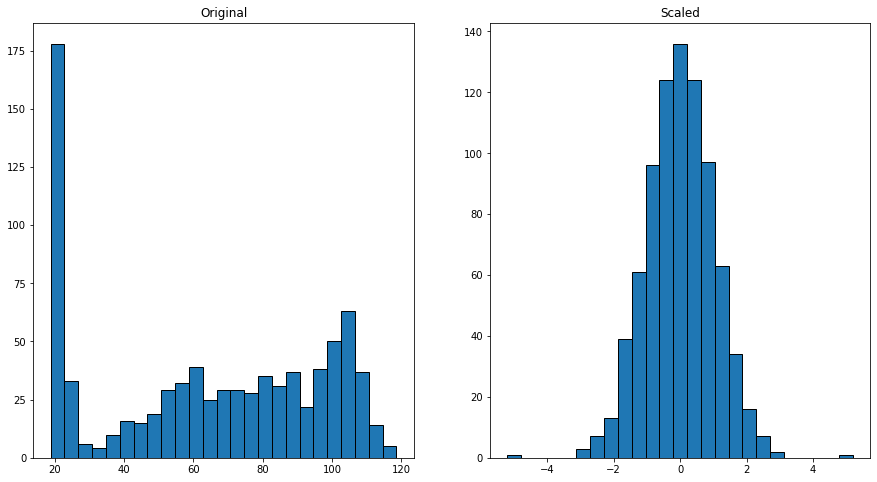

In [140]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

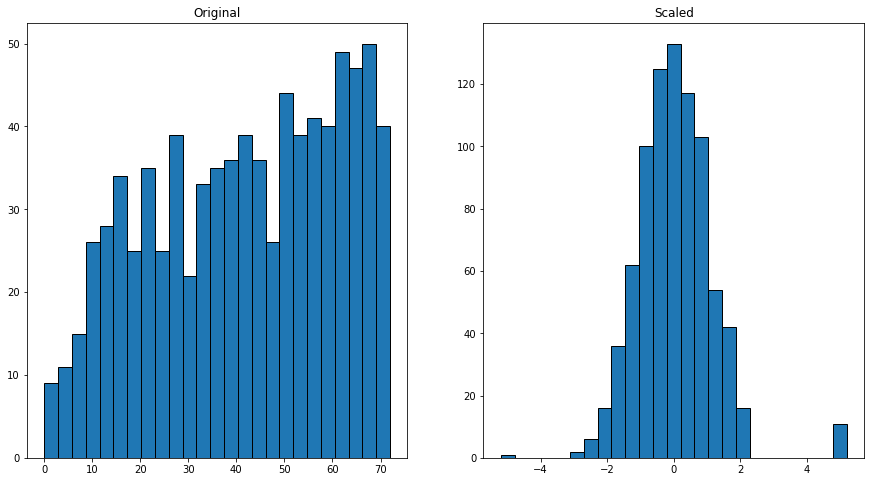

In [141]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

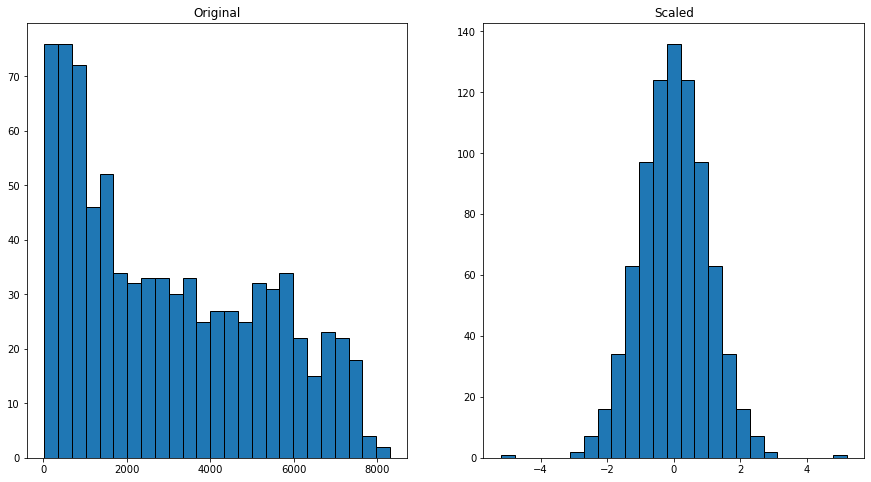

In [142]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

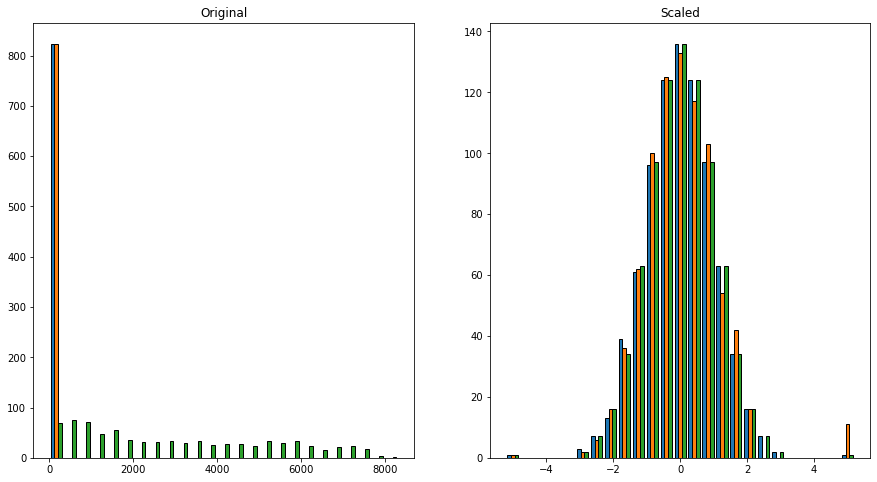

In [143]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled, bins=25, ec='black')
plt.title('Scaled')

4.) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [144]:
qt = sklearn.preprocessing.QuantileTransformer()

In [145]:
qt.fit_transform(train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (824). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


array([[0.2417983 , 0.06925881, 0.05224787],
       [0.28068044, 0.29100851, 0.2818955 ],
       [0.27339004, 0.46111786, 0.33778858],
       ...,
       [0.81773998, 0.21202916, 0.46780073],
       [0.2563791 , 0.54921021, 0.30376671],
       [0.37424058, 0.13912515, 0.23936817]])

In [146]:
qt_train_scaled = qt.transform(train)
qt_validate_scaled = qt.transform(validate)
qt_test_scaled = qt.transform(test)

In [147]:
qt_train_scaled = pd.DataFrame(qt_train_scaled, columns=train.columns)
qt_validate_scaled = pd.DataFrame(qt_validate_scaled, columns=train.columns)
qt_test_scaled = pd.DataFrame(qt_test_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled')

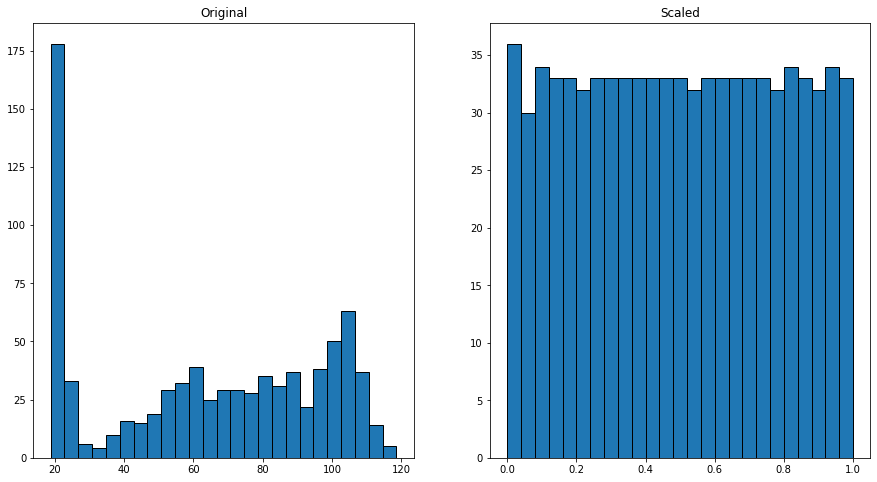

In [148]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

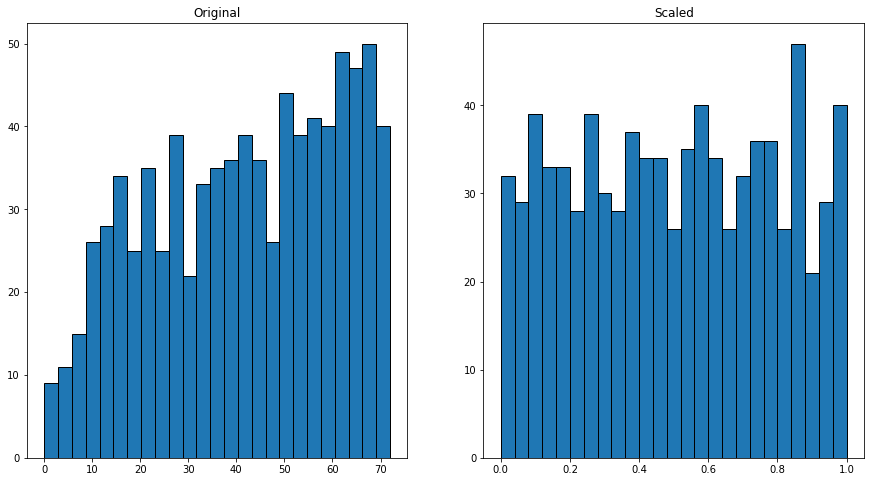

In [149]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

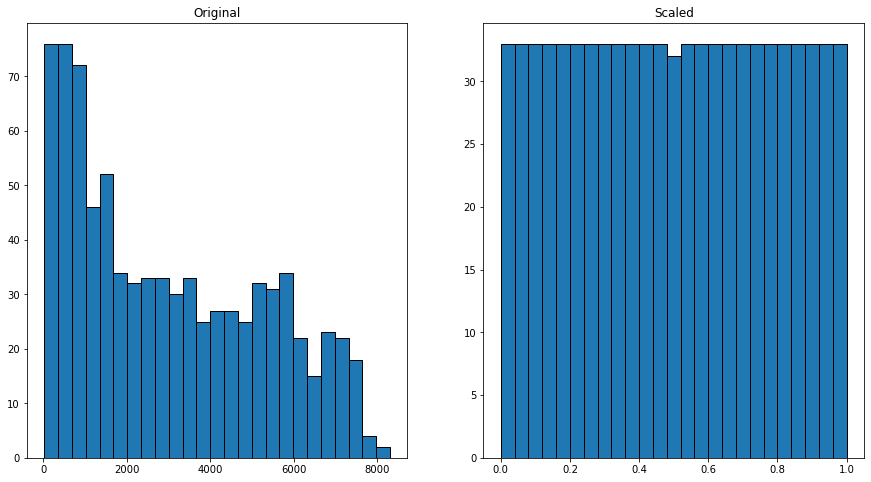

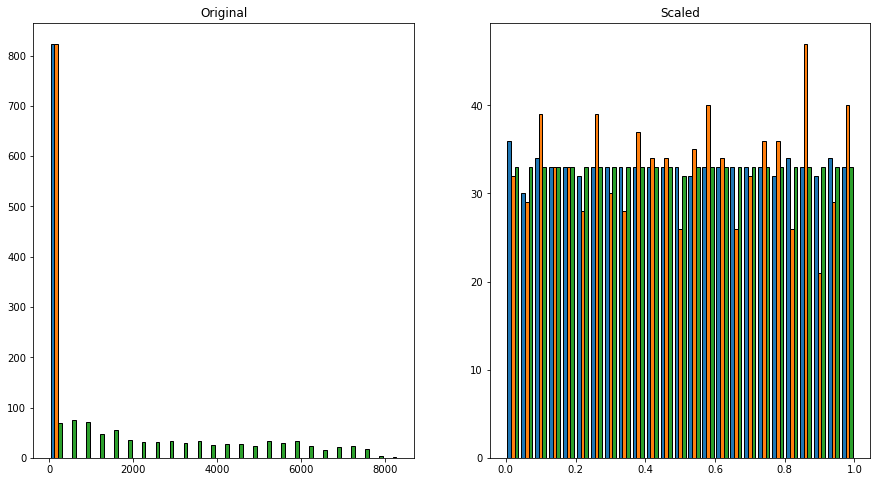

In [150]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled')

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled, bins=25, ec='black')
plt.title('Scaled')